## Rat Inspection Data Cleaning and EDA

This notebook is an initial study of the rat inspection data.

In [1]:
## Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import glob

In [2]:
## Imports the rat inspection data from the split up csv files and concatenates them into one dataframe called rat_insp.

path = r'data/split_up_rat_inspection_data' 
all_files = glob.glob(os.path.join(path , "*.csv"))
rat_insp = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [3]:
display(rat_insp.sample(3)) #get a sense of what data looks like

print(f"Below are the columns in the dataframe.\n")
display(rat_insp.columns)

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,...,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,NTA
1300243,Treatments,2656602,PC7064274,5,3.016030e+09,3.0,1603.0,32.0,1072,DE KALB AVENUE,...,Brooklyn,12/18/2017 10:32:11 AM,Bait applied,12/21/2017 10:24:16 AM,"(40.693601357589, -73.931862515557)",3.0,36.0,289.0,3043273.0,Bedford-Stuyvesant (East)
637035,Initial,13411285,PC7876805,1,5.052800e+09,5.0,5280.0,28.0,81,RUSSELL STREET,...,Staten Island,06/15/2022 11:10:09 AM,Failed for Other R,06/16/2022 03:39:22 PM,"(40.539780530262, -74.149336696038)",3.0,51.0,15601.0,5067666.0,Great Kills-Eltingville
2097278,Initial,11715174,PC6094676,1,1.005030e+09,1.0,503.0,1.0,97,SULLIVAN STREET,...,Manhattan,03/22/2011 11:51:18 AM,Passed,03/24/2011 08:59:28 AM,"(40.725524021007, -74.003135217816)",2.0,1.0,49.0,1007775.0,SoHo-Little Italy-Hudson Square


Below are the columns in the dataframe.



Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION', 'COMMUNITY BOARD', 'COUNCIL DISTRICT', 'CENSUS TRACT',
       'BIN', 'NTA'],
      dtype='str')

In [4]:
#Make letters lowercase, replace spaces with underscores, get rid of text after '(' etc
rat_insp.columns = [t.partition('(')[0].strip().lower().replace(' ', '_') for t in rat_insp.columns] #apply to column headers


In [5]:
# boro_code and borough appear to be redundant information.
# We check if the borough code corresponds to borough names.

display(rat_insp['boro_code'].value_counts())
display(rat_insp['borough'].value_counts())

boro_code
1.0    956780
3.0    886910
2.0    831929
4.0    246998
5.0     67182
9.0       330
Name: count, dtype: int64

borough
Manhattan        956780
Brooklyn         886910
Bronx            831929
Queens           246998
Staten Island     67182
Name: count, dtype: int64

In [6]:
# boro_code 9 seems to correspond to 'Unspecified' borough. 
# We check if all rows with boro_code 9 have borough as 'Unspecified'.
rat_insp[rat_insp['boro_code'] == 9]['borough'].value_counts()

# boro_code 9 corresponds to 'Unspecified' so we set those with boro_code 9 to 
# have borough as 'Unspecified' just to be safe. 
rat_insp.loc[rat_insp['boro_code'] == 9, 'borough'] = 'Unspecified'

# Now, we drop boro_code since we have the borough column which is more descriptive.
rat_insp.drop(columns=['boro_code'], inplace=True)

In [7]:
# Make the datetime the correct format
# This is currently commented out because it takes a long time to run. 

rat_insp['inspection_date'] = pd.to_datetime(rat_insp['inspection_date']) 

/var/folders/ry/m6r2ndwd10bdv8tvww5hr2680000gn/T/ipykernel_94016/3424927455.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rat_insp['inspection_date'] = pd.to_datetime(rat_insp['inspection_date'])


In [8]:
# It looks like locationa and latitude and longitude are also redundant. 
# We check if the location corresponds to the lat and long values.
display(rat_insp[['location', 'latitude', 'longitude']].sample(5))

,location,latitude,longitude
713523,"(40.691490873798, -73.927782690735)",40.691491,-73.927783
2590252,"(40.846888943905, -73.899778412336)",40.846889,-73.899778
1489853,"(40.881590976529, -73.874975597336)",40.881591,-73.874976
2053611,"(40.692466702232, -73.921608069932)",40.692467,-73.921608
2051869,"(40.84835121649, -73.923953825816)",40.848351,-73.923954


In [9]:
# Here, we drop a lot of the extra columns we might not need for our analysis. 
# We can always add them back in later if we find that we need them.

# It looks like job_ticket_or_work_order_id, job_id, and job_progress are all related to the same thing. 
# It looks like x_coord, y_coord, community board, council district, and census tract are all related to location.
# We drop these.

rat_insp.drop(columns=['job_ticket_or_work_order_id', 'job_id', 
                       'job_progress', 'x_coord', 'y_coord', 'community_board', 
                       'council_district', 'census_tract'], inplace=True)

# We also drop house_numer, street_name.

rat_insp.drop(columns=['house_number', 'street_name'], inplace=True)

# We also drop block, lot, and nta.

rat_insp.drop(columns=['block', 'lot', 'nta'], inplace=True)

# We also probably won't be using bbl nor bin for anything.

rat_insp.drop(columns=['bbl','bin'], inplace=True)



In [10]:
# Let's look at the "results" of the inspections.

rat_insp['result'].value_counts()

# "Failed for Other R" seems to be irrelevant if we are focused on inspections involving rats.
# "Bait applied" could indicate that there were rats, but it could also indicate that there were just signs of rats. 
# We will keep it for now and see if we can find more information about it later.

# It is not clear what "Stoppage Done" and "Cleanup Done" mean. We need to look into this more later as well.

result
Passed                1761938
Bait applied           410256
Failed for Rat Act     289592
Failed for Other R     251783
Rat Activity           214102
Monitoring visit        46892
Stoppage done           12153
Cleanup done             3389
Name: count, dtype: int64

In [11]:
# To-Do: Clean-up the "inspection_type" column as well.
# Let's check the inspection_type column and see if there are any types of inspections that we might want to focus on or exclude.
rat_insp['inspection_type'].value_counts()

inspection_type
Initial       2059794
Compliance     457646
Treatments     457148
Stoppage        12153
Clean Ups        3389
Name: count, dtype: int64

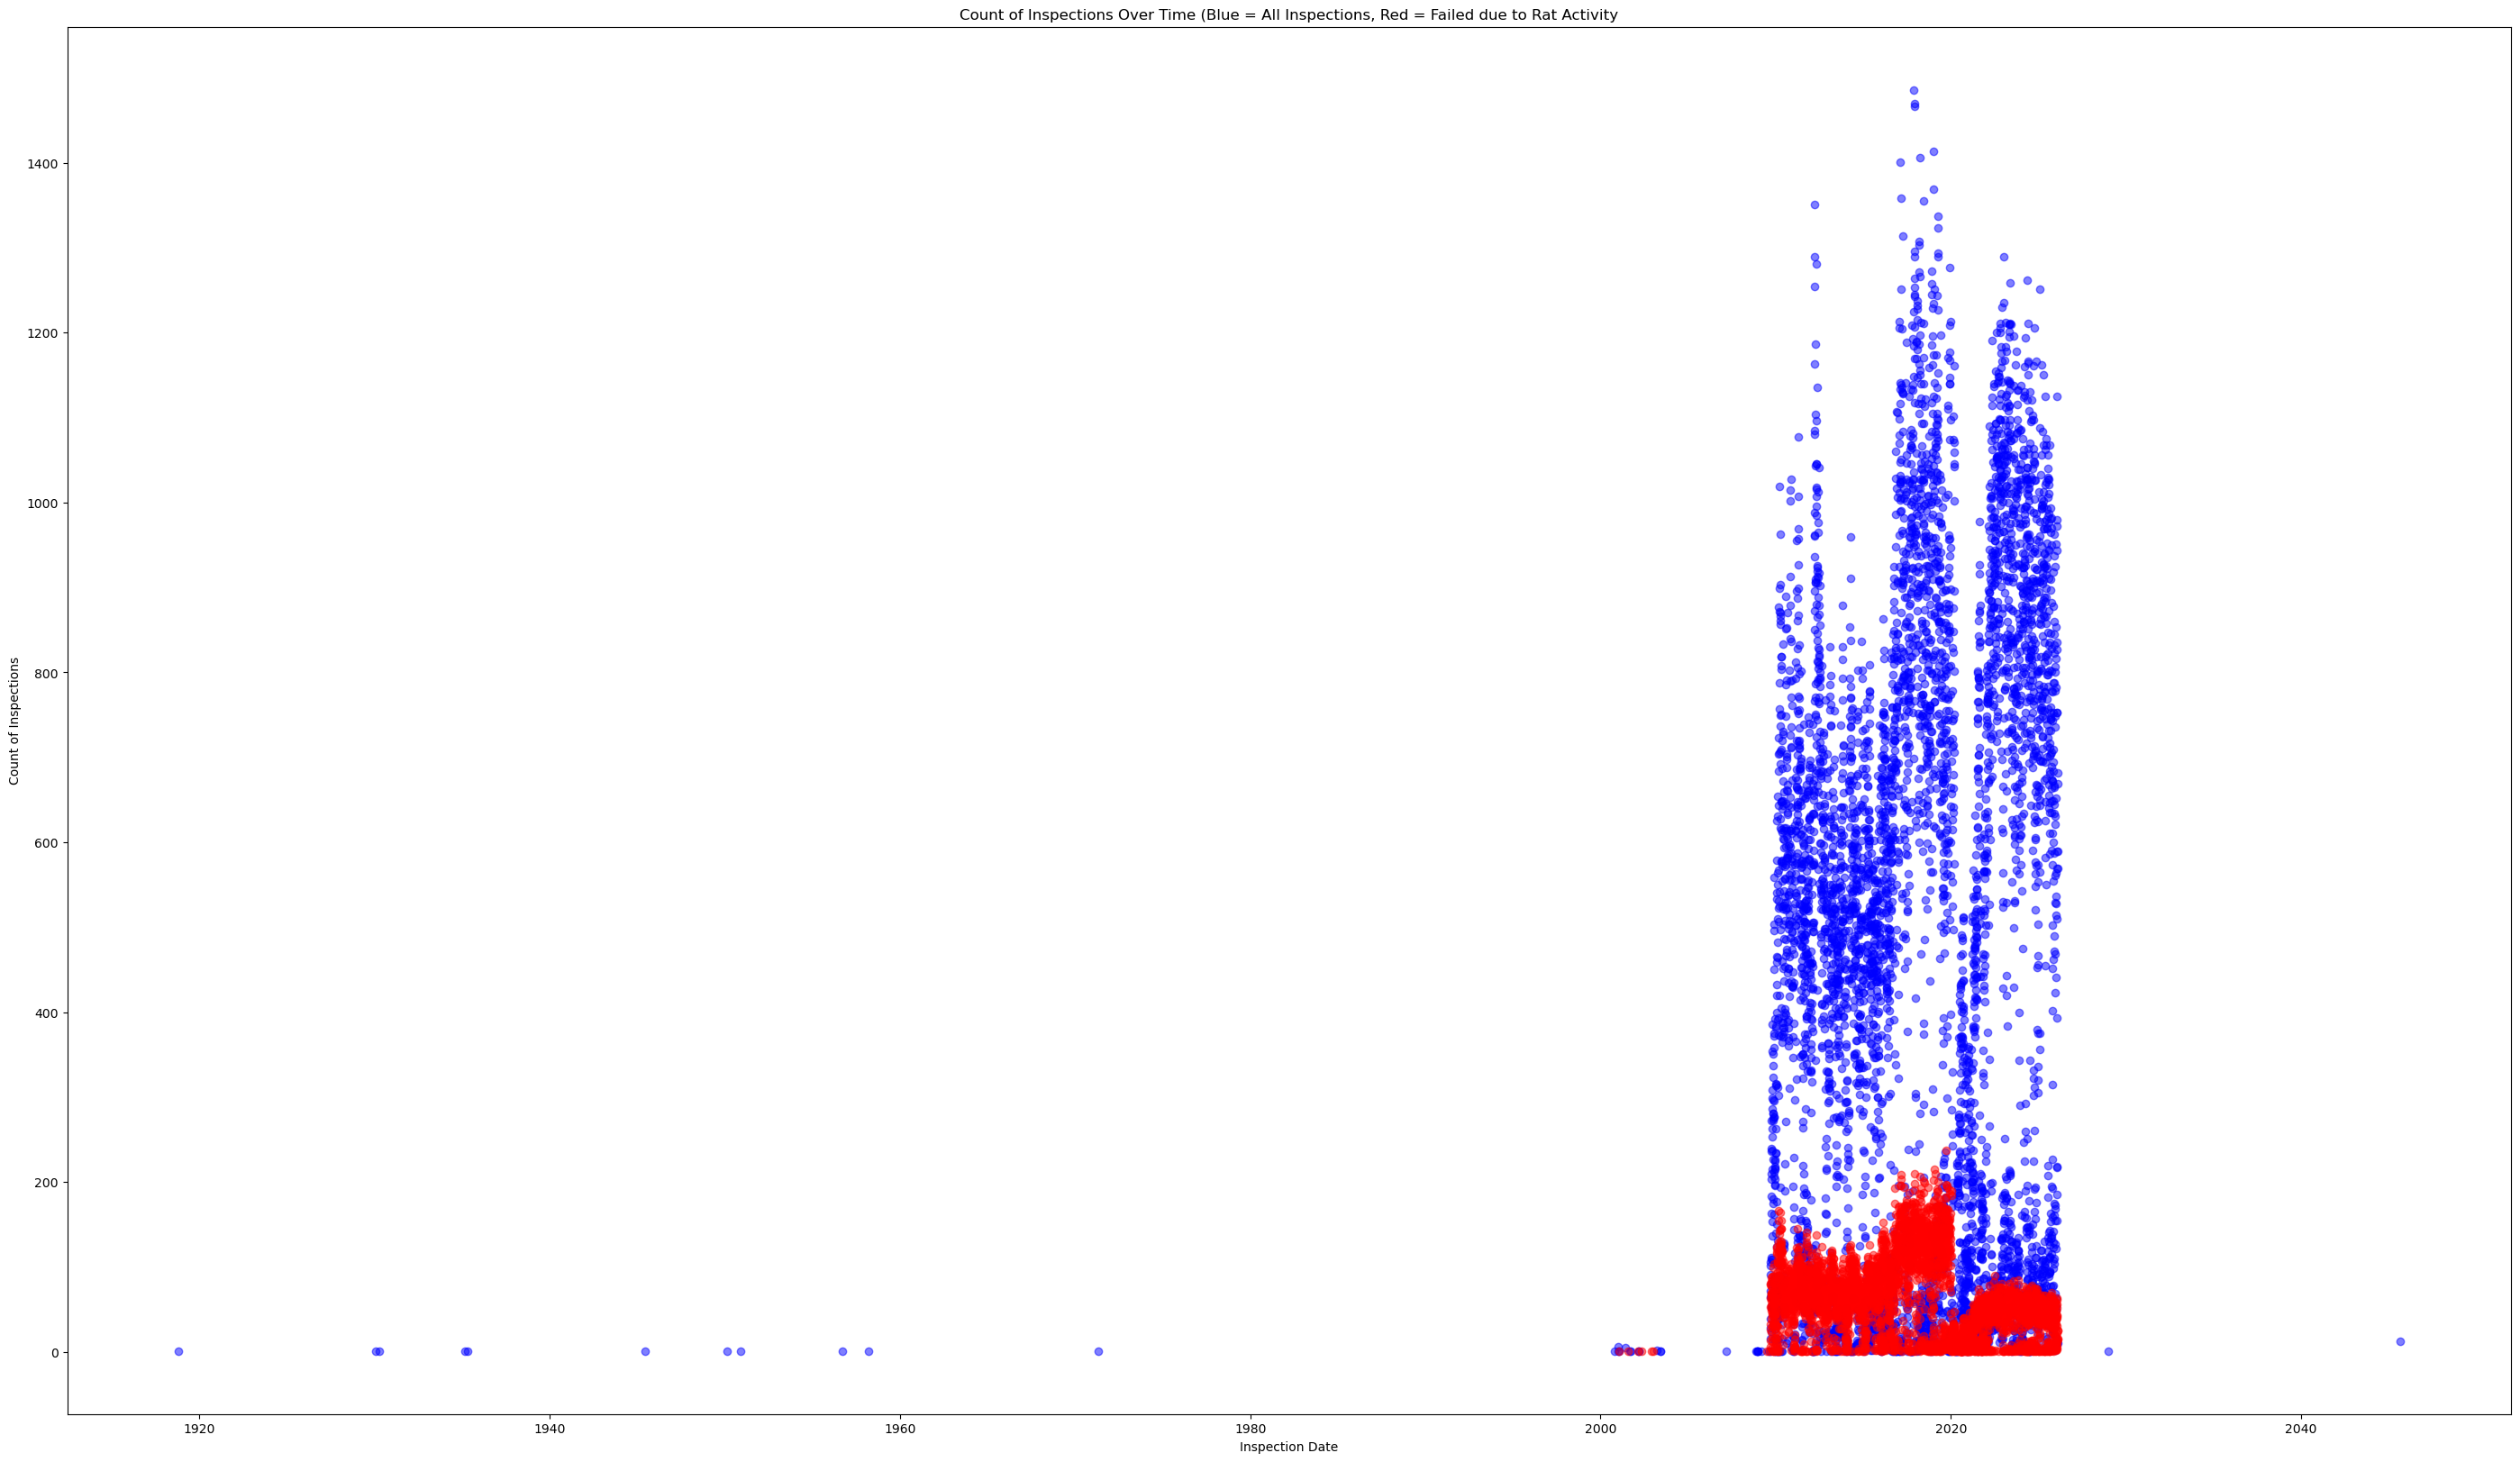

In [12]:
failed_rat_act = rat_insp[rat_insp['result'] == 'Failed for Rat Act']

failedidate = failed_rat_act.groupby(failed_rat_act['inspection_date'].dt.date).size().reset_index(name='count')

notfail = rat_insp[rat_insp['result'] != 'Failed for Rat Act']

idate = notfail.groupby(notfail['inspection_date'].dt.date).size().reset_index(name='count')


plt.figure(figsize=(35,20))
plt.plot(idate['inspection_date'], idate['count'], 'o', color="b", alpha=0.50)
plt.plot(failedidate['inspection_date'], failedidate['count'], 'o', color="r", alpha=0.50)
plt.xlabel('Inspection Date')
plt.ylabel('Count of Inspections')
plt.title('Count of Inspections Over Time (Blue = All Inspections, Red = Failed due to Rat Activity')
plt.show()

In [13]:
# The plot above seems to have some stranget data points.
# For example, we have an entry for 2045-08-28, which is in the future. 
# We also have some very old data points from before the mid 2010s.

rat_insp['inspection_date'].describe()

display(rat_insp[rat_insp['inspection_date'] > '2026-02-13'])

display(rat_insp[rat_insp['inspection_date'] > '2009-01-01'])

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
188930,Treatments,10002.0,40.716081,-73.984092,Manhattan,2045-08-28 11:25:07,Bait applied,09/08/2025 09:11:10 AM,"(40.716080960671, -73.984091663748)"
385732,Treatments,10009.0,40.725956,-73.977458,Manhattan,2045-08-28 09:51:07,Bait applied,09/08/2025 09:11:48 AM,"(40.725955521859, -73.977458033998)"
836012,Treatments,10002.0,40.714155,-73.988908,Manhattan,2045-08-28 12:22:07,Bait applied,09/08/2025 09:12:38 AM,"(40.714154700058, -73.988907774452)"
1121923,Treatments,10009.0,40.721342,-73.979851,Manhattan,2045-08-28 10:44:07,Bait applied,09/08/2025 09:11:15 AM,"(40.72134201417, -73.979851451478)"
1122622,Treatments,10002.0,40.711295,-73.989049,Manhattan,2045-08-28 11:39:07,Bait applied,09/08/2025 09:12:40 AM,"(40.711294664235, -73.989048928049)"
1273688,Treatments,10002.0,40.721123,-73.985948,Manhattan,2045-08-28 10:57:07,Bait applied,09/02/2025 02:23:18 PM,"(40.721123341806, -73.985948372848)"
1332132,Treatments,10009.0,40.729384,-73.980040,Manhattan,2045-08-28 09:39:07,Bait applied,09/08/2025 09:12:00 AM,"(40.729384213002, -73.980040237421)"
1360789,Treatments,10009.0,40.723028,-73.981972,Manhattan,2045-08-28 10:30:07,Bait applied,09/08/2025 09:11:05 AM,"(40.723027654172, -73.981972273382)"
1426125,Treatments,10032.0,40.844892,-73.940721,Manhattan,2029-01-01 09:35:51,Bait applied,02/01/2016 11:11:16 AM,"(40.844891744339, -73.940721130861)"
1466087,Treatments,10002.0,40.712656,-73.994420,Manhattan,2045-08-28 12:08:07,Bait applied,09/02/2025 06:41:21 AM,"(40.712656456894, -73.99441974449)"


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
0,Initial,10457.0,40.848959,-73.896988,Bronx,2015-03-17 14:42:29,Passed,03/20/2015 09:12:41 AM,"(40.848958752251, -73.896988449169)"
1,Initial,10035.0,40.808578,-73.939493,Manhattan,2016-08-31 11:25:50,Passed,09/02/2016 09:35:20 AM,"(40.808578180403, -73.939492882054)"
2,Initial,10013.0,40.721991,-74.004080,Manhattan,2017-07-25 10:46:28,Passed,08/02/2017 10:55:37 AM,"(40.721991476451, -74.004080256242)"
3,Initial,10013.0,40.717905,-73.999794,Manhattan,2021-06-04 10:40:32,Passed,06/07/2021 10:30:11 AM,"(40.717904589931, -73.999794376402)"
4,Initial,10026.0,40.802355,-73.954557,Manhattan,2018-04-04 11:20:13,Passed,04/06/2018 11:14:09 AM,"(40.802354553628, -73.95455709997)"
...,...,...,...,...,...,...,...,...,...
2990125,Compliance,NaN,0.000000,0.000000,Brooklyn,2015-12-17 16:10:04,Passed,12/28/2015 09:22:07 AM,"(0.0, 0.0)"
2990126,Initial,10128.0,40.780342,-73.949958,Manhattan,2018-07-26 09:52:44,Passed,07/30/2018 09:57:39 AM,"(40.780342483894, -73.949957542423)"
2990127,Initial,10456.0,40.837752,-73.910457,Bronx,2012-03-13 15:30:25,Passed,03/16/2012 10:03:37 AM,"(40.837752297275, -73.910457017259)"
2990128,Initial,11221.0,40.693508,-73.927077,Brooklyn,2017-09-19 14:51:45,Passed,09/20/2017 01:00:03 PM,"(40.693507836149, -73.927077306662)"


In [14]:
# We drop the outliers.

rat_insp = rat_insp[(rat_insp['inspection_date'] >= '2010-01-01') & (rat_insp['inspection_date'] <= '2026-02-13')]

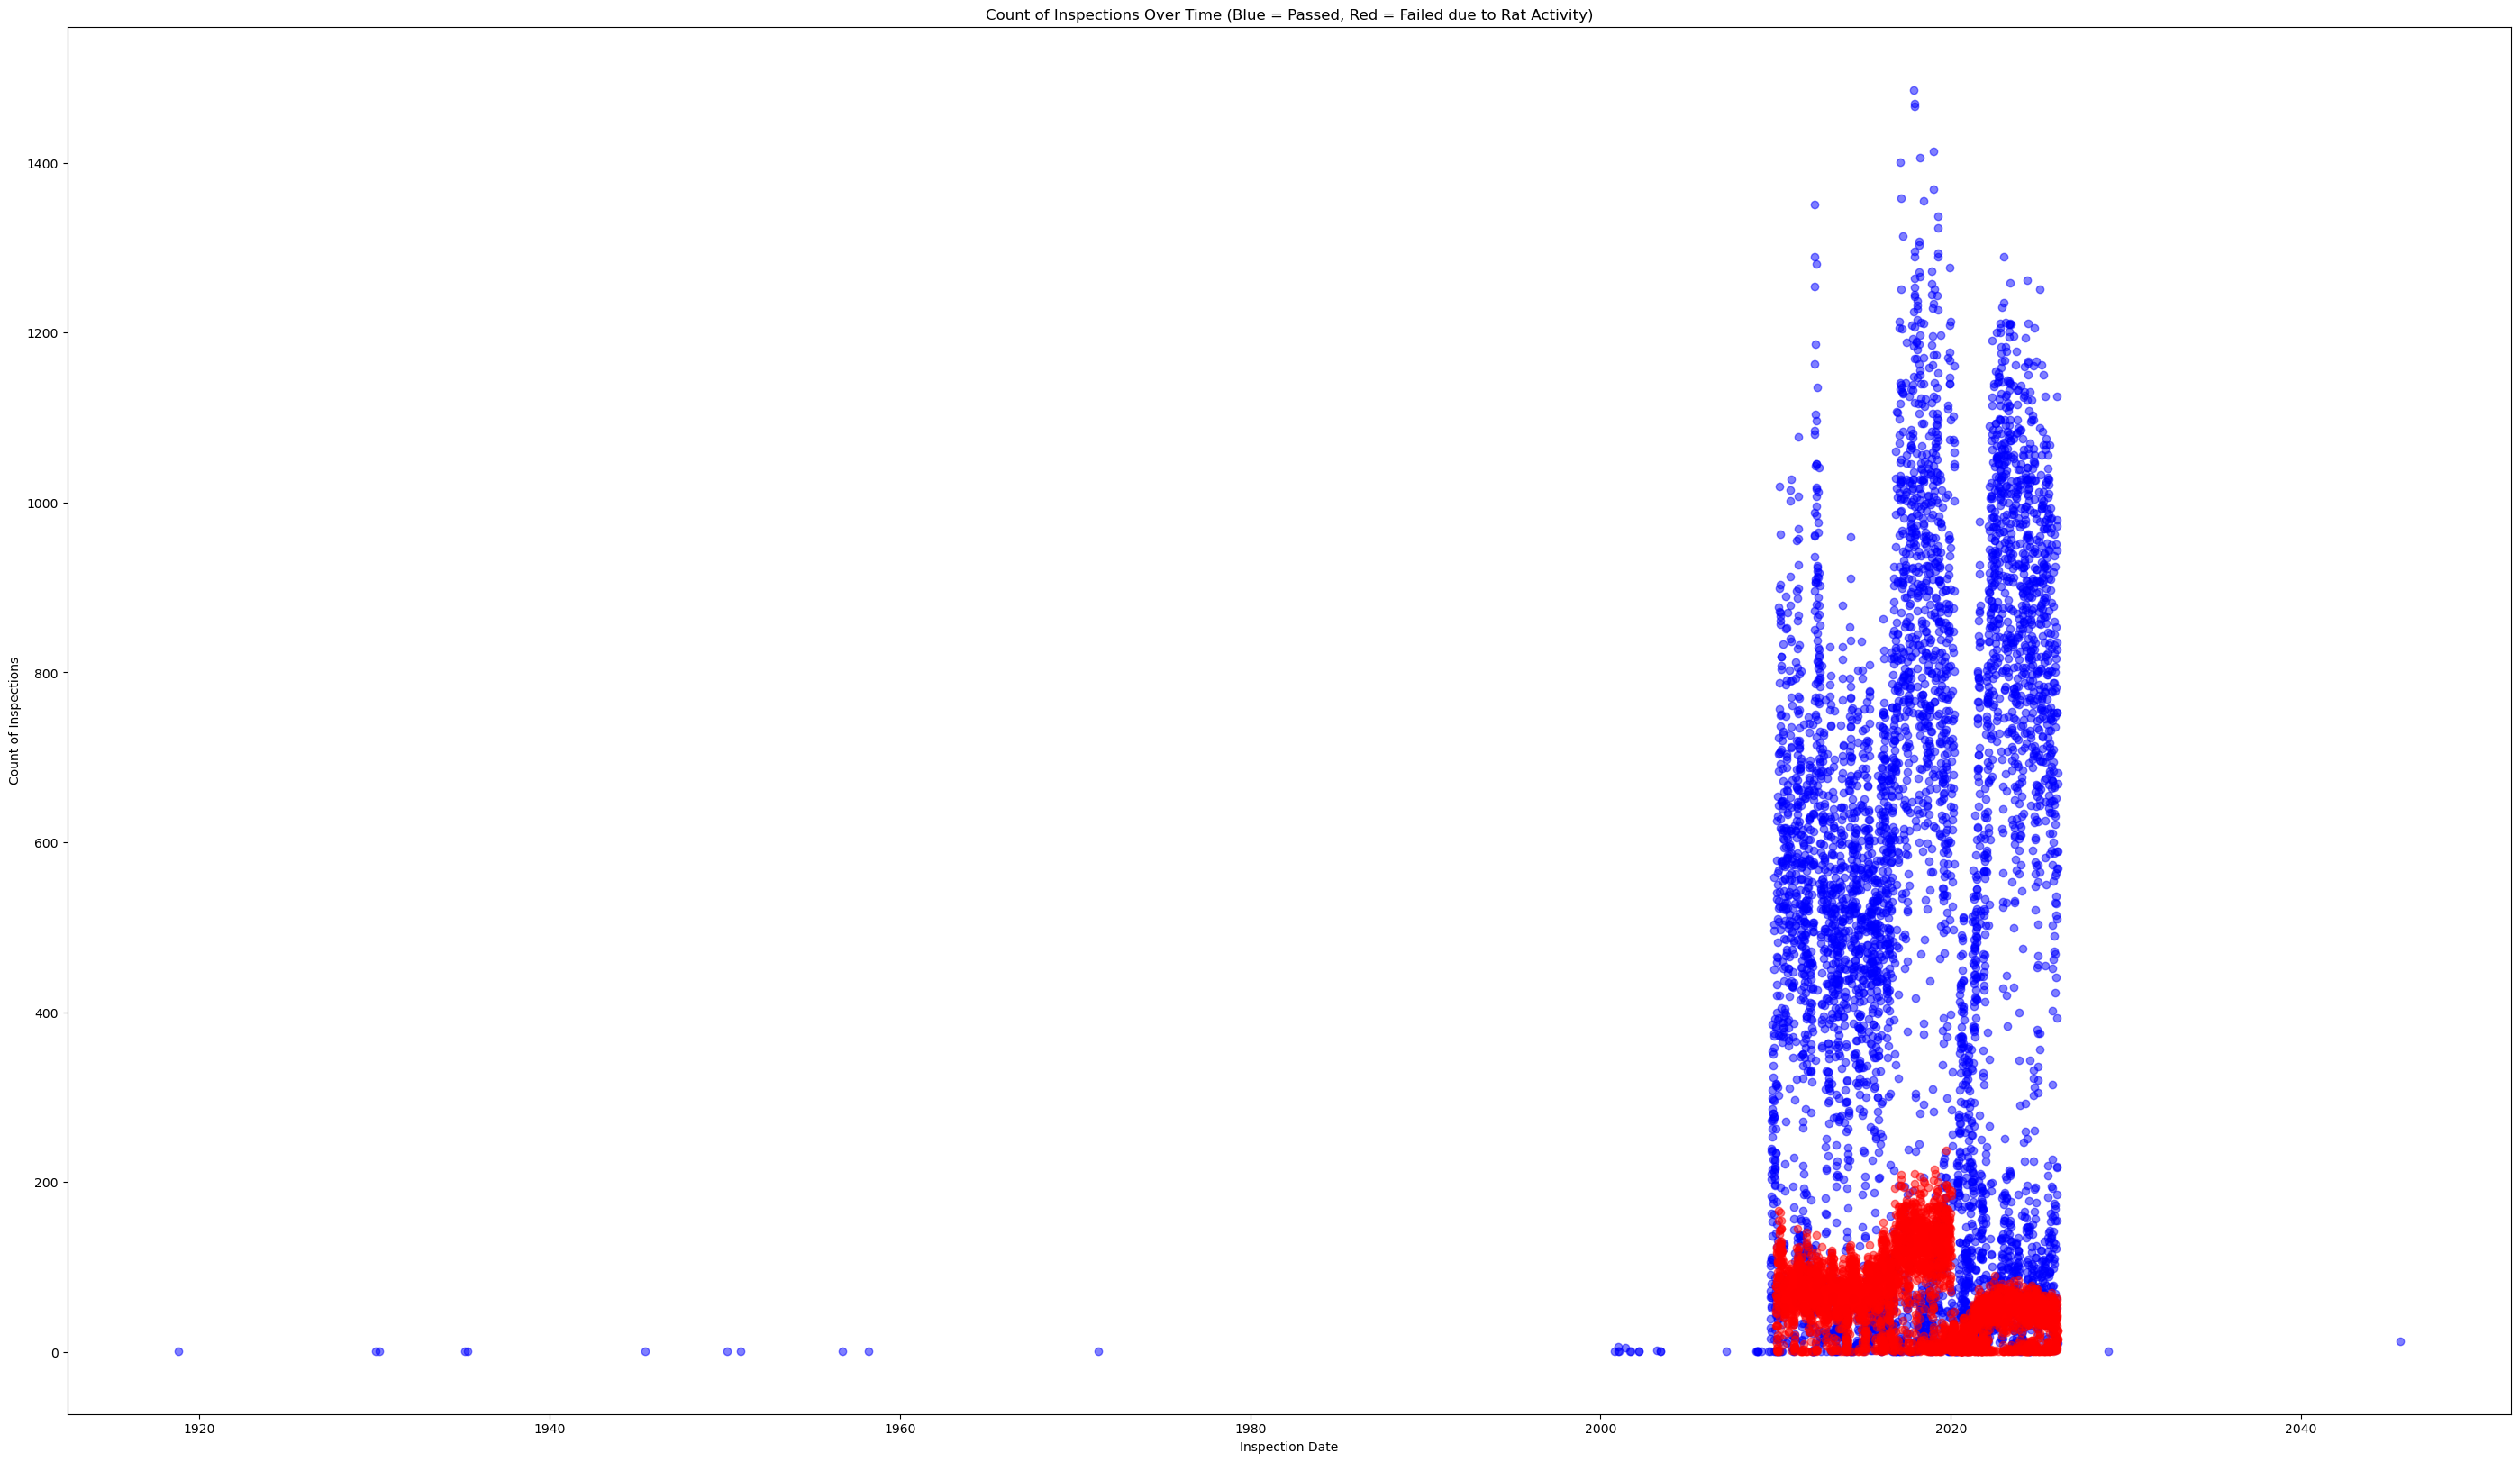

In [15]:
failed_rat_act = rat_insp[rat_insp['result'] == 'Failed for Rat Act']

failedidate = failed_rat_act.groupby(failed_rat_act['inspection_date'].dt.date).size().reset_index(name='count')

passed = rat_insp[rat_insp['result'] == 'Passed']

passidate = passed.groupby(passed['inspection_date'].dt.date).size().reset_index(name='count')


plt.figure(figsize=(35,20))
plt.plot(idate['inspection_date'], idate['count'], 'o', color="b", alpha=0.50)
plt.plot(failedidate['inspection_date'], failedidate['count'], 'o', color="r", alpha=0.50)
plt.xlabel('Inspection Date')
plt.ylabel('Count of Inspections')
plt.title('Count of Inspections Over Time (Blue = Passed, Red = Failed due to Rat Activity)')
plt.show()

In [16]:
import plotly.figure_factory as ff


# Add a dummy column to count each row
rat_insp['dummy_count'] = 1

fig = ff.create_hexbin_mapbox(
    data_frame=rat_insp,
    lat="latitude",
    lon="longitude",
    nx_hexagon=20,             # Number of hexagons in x direction
    color="dummy_count",       # Sum of dummy_count = number of occurrences
    agg_func=np.sum,           # Sum the dummy column
    opacity=0.85,
    labels={"color": "Number of Inspections"},
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(b=0, t=0, l=0, r=0),
)
fig.show()



/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:122: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(x).astype(int)
/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:123: RuntimeWarning: invalid value encountered in cast
  iy1 = np.round(y).astype(int)
/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:124: RuntimeWarning: invalid value encountered in cast
  ix2 = np.floor(x).astype(int)
/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:125: RuntimeWarning: invalid value encountered in cast
  iy2 = np.floor(y).astype(int)


In [17]:
# The above map has points not in New York City.
# Let's check the latitude and longitude data to see if there are any obvious errors or outliers.

display(rat_insp[['latitude', 'longitude']].describe())

,latitude,longitude
count,2.948346e+06,2.948346e+06
mean,4.050330e+01,-7.346812e+01
std,3.224818e+00,5.847416e+00
min,-1.890702e+01,-7.946610e+01
25%,4.069402e+01,-7.395835e+01
50%,4.075502e+01,-7.393541e+01
75%,4.082992e+01,-7.390290e+01
max,4.091286e+01,0.000000e+00


In [18]:
# Let's look at the rows with the minimum and maximum latitude and longitude values to see if there are any obvious errors or outliers.
display(rat_insp[rat_insp['latitude'] == rat_insp['latitude'].min()])
display(rat_insp[rat_insp['latitude'] == rat_insp['latitude'].max()])
display(rat_insp[rat_insp['longitude'] == rat_insp['longitude'].min()])
display(rat_insp[rat_insp['longitude'] == rat_insp['longitude'].max()])

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location,dummy_count
330380,Compliance,11417.0,-18.907019,-79.466103,Queens,2010-03-04 13:10:29,Failed for Other R,03/11/2010 09:34:29 AM,"(-18.9070188901517, -79.4661030572311)",1
1742040,Initial,11417.0,-18.907019,-79.466103,Queens,2010-01-14 08:36:00,Failed for Other R,01/20/2010 10:58:28 AM,"(-18.9070188901517, -79.4661030572311)",1


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location,dummy_count
207894,Initial,10471.0,40.912863,-73.902472,Bronx,2013-06-26 16:15:09,Passed,07/01/2013 10:27:51 AM,"(40.91286346943, -73.902471669247)",1
267469,Initial,10471.0,40.912863,-73.902472,Bronx,2020-02-19 16:15:00,Failed for Other R,02/20/2020 11:18:11 AM,"(40.91286346943, -73.902471669247)",1
886024,Initial,10471.0,40.912863,-73.902472,Bronx,2022-01-21 15:10:00,Rat Activity,01/24/2022 11:55:33 AM,"(40.91286346943, -73.902471669247)",1
1022101,Initial,10471.0,40.912863,-73.902472,Bronx,2018-06-28 15:55:37,Passed,06/29/2018 10:24:47 AM,"(40.91286346943, -73.902471669247)",1
2031680,Initial,10471.0,40.912863,-73.902472,Bronx,2014-11-21 16:00:51,Failed for Rat Act,11/24/2014 09:21:05 AM,"(40.91286346943, -73.902471669247)",1
2563102,Compliance,10471.0,40.912863,-73.902472,Bronx,2015-08-11 16:10:08,Passed,08/12/2015 03:43:37 PM,"(40.91286346943, -73.902471669247)",1
2652803,Compliance,10471.0,40.912863,-73.902472,Bronx,2022-02-24 16:25:00,Rat Activity,03/01/2022 12:17:06 PM,"(40.91286346943, -73.902471669247)",1


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location,dummy_count
330380,Compliance,11417.0,-18.907019,-79.466103,Queens,2010-03-04 13:10:29,Failed for Other R,03/11/2010 09:34:29 AM,"(-18.9070188901517, -79.4661030572311)",1
1742040,Initial,11417.0,-18.907019,-79.466103,Queens,2010-01-14 08:36:00,Failed for Other R,01/20/2010 10:58:28 AM,"(-18.9070188901517, -79.4661030572311)",1


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location,dummy_count
241,Initial,NaN,0.0,0.0,Manhattan,2022-10-18 11:41:10,Rat Activity,10/19/2022 10:50:17 AM,"(0.0, 0.0)",1
383,Initial,NaN,0.0,0.0,Bronx,2023-01-11 11:20:09,Failed for Rat Act,01/19/2023 02:01:26 PM,"(0.0, 0.0)",1
446,Initial,NaN,0.0,0.0,Staten Island,2015-08-03 11:51:18,Failed for Other R,08/05/2015 10:11:32 AM,"(0.0, 0.0)",1
495,Initial,NaN,0.0,0.0,Queens,2010-11-24 15:00:09,Passed,12/13/2010 10:44:52 AM,"(0.0, 0.0)",1
610,Initial,NaN,0.0,0.0,Manhattan,2022-11-23 11:40:00,Rat Activity,12/01/2022 01:43:47 PM,"(0.0, 0.0)",1
...,...,...,...,...,...,...,...,...,...,...
2989399,Initial,NaN,0.0,0.0,Manhattan,2019-02-20 11:36:09,Passed,02/21/2019 09:16:48 AM,"(0.0, 0.0)",1
2989444,Initial,NaN,0.0,0.0,Brooklyn,2019-02-13 16:15:28,Failed for Other R,02/14/2019 10:25:51 AM,"(0.0, 0.0)",1
2989458,Compliance,NaN,0.0,0.0,Brooklyn,2015-12-26 10:41:16,Failed for Rat Act,12/28/2015 11:49:52 AM,"(0.0, 0.0)",1
2989699,Initial,NaN,0.0,0.0,Bronx,2017-07-12 15:40:09,Passed,07/19/2017 11:43:23 AM,"(0.0, 0.0)",1


In [19]:
# For these entries, let's set their latitude and longitude values to NaN since they are likely to be errors.
rat_insp.loc[rat_insp['latitude'] == rat_insp['latitude'].min(), ['latitude', 'longitude']] = np.nan
rat_insp.loc[rat_insp['latitude'] == rat_insp['latitude'].max(), ['latitude', 'longitude']] = np.nan
rat_insp.loc[rat_insp['longitude'] == rat_insp['longitude'].min(), ['latitude', 'longitude']] = np.nan
rat_insp.loc[rat_insp['longitude'] == rat_insp['longitude'].max(), ['latitude', 'longitude']] = np.nan

In [21]:
# Let's save the cleaned dataframe to a new csv file for future use.
# Since the dataframe is quite large, we will split it up into multiple csv files based on the year of the inspection date.
for year in rat_insp['inspection_date'].dt.year.unique():
    yearly_data = rat_insp[rat_insp['inspection_date'].dt.year == year]
    yearly_data.to_csv(f'data/cleaned_rat_inspection_data/rat_inspection_{year}.csv', index=False)